# Differential gene expression


## Obtaining the data

In computational biology, working with large datasets is a fundamental part of data analysis. One of the most common formats for storing structured data is the CSV (Comma-Separated Values) file.
A CSV file is essentially a plain text file where each row represents a record, and columns are separated by commas. This format makes it easy to share and manipulate tabular data.

In this course, we will use [Pandas](https://pandas.pydata.org/docs/), a powerful Python library designed for data manipulation and analysis, to handle our data. Before we can analyze any dataset, we must first obtain and load it into a format that allows efficient processing.

Note: [Polars](https://pola.rs/) is way better (in my "professional" opinion), but it is not as popular as pandas.

In [1]:
import requests
import io
import pandas as pd
import numpy as np

The dataset we will be working with contains gene expression data and is hosted on GitHub.
To download and load this dataset into memory, we can use the `requests` library to make an HTTP request and retrieve the file. Below is a Python function that performs this task.
Note that this is only really done because of how I am hosting the data.

In [2]:
def get_gene_expr_data() -> pd.DataFrame:
    csv_path = "https://github.com/oasci/pitt-biosc1540-2025s/raw/refs/heads/main/content/data/gene-expr/SSvLIS-day3/ground-day3-gene-counts-SS-and-LIS.csv"
    response = requests.get(csv_path)
    if response.status_code == 200:
        csv_text = response.text
        data = pd.read_csv(io.StringIO(csv_text))
        return data
    else:
        print(f"Failed to fetch file. Status code: {response.status_code}")

This function does the following:

1. Uses the [`requests`](https://docs.python-requests.org/en/latest/) library to send an HTTP GET request to the GitHub-hosted CSV file.
2. Checks if the request was successful by verifying the status code.
3. Reads the CSV file's content and converts it into a Pandas DataFrame using `pd.read_csv()`.
4. Returns the DataFrame for further analysis.

A DataFrame in Pandas is a two-dimensional, table-like data structure similar to an Excel spreadsheet. It consists of:

- Rows (each row represents an observation or record).
- Columns (each column represents a variable or feature).
- Indexing (a way to reference rows and columns efficiently).

You can think of a DataFrame as an enhanced Excel sheet that allows programmatic manipulation, filtering, and analysis of data. Unlike an Excel sheet, however, Pandas provides powerful tools to handle missing data, apply complex transformations, and perform statistical computations efficiently.

Once we retrieve the CSV file, we use [`pd.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to load the text data into a DataFrame:

```python
data = pd.read_csv(io.StringIO(csv_text))
```

Here, `io.StringIO(csv_text)` treats the downloaded CSV content as if it were a file, allowing `pd.read_csv()` to parse it directly.

In [3]:
df = get_gene_expr_data()

## Exploring the data

Now that we have successfully loaded our dataset into a Pandas DataFrame, it is essential to understand how to explore, manipulate, and extract meaningful information from it.
In this section, we will cover fundamental operations such as viewing data, indexing, slicing, filtering, and selecting subsets of a DataFrame.

### Viewing the First and Last Few Rows

We can use the `.head()` and `.tail()` methods to preview the data:

In [4]:
# Display the first five rows
print(df.head())

         Gene  SS316.1  SS316.2  SS316.3  SS316.4  LIS.1  LIS.2  LIS.3  LIS.4
0  PA14_00010      513      355     1182      735     19     63     46    151
1  PA14_00020      446      353      966      593      3     56      4     82
2  PA14_00030      320      316      704      565      0     40      0     73
3  PA14_00050      572      575     1252      867      5     74    106    155
4  PA14_00060      104       92      304      200      1      7      9     20


In [5]:
# Display the last five rows
print(df.tail())

            Gene  SS316.1  SS316.2  SS316.3  SS316.4  LIS.1  LIS.2  LIS.3  \
5959  PA14_73370      459      368     1149      671      7     55     71   
5960  PA14_73390      168      162      645      345      0      3      3   
5961  PA14_73400      221       95      555      376     13     24      8   
5962  PA14_73410      839      463     1952      994      3     58     36   
5963  PA14_73420      167      181      493      242      1     26     17   

      LIS.4  
5959    119  
5960     37  
5961     66  
5962    118  
5963     19  


By default, `.head()` and `.tail()` return the first and last five rows, respectively. You can specify a different number of rows as an argument, e.g., `df.head(10)` for the first ten rows.

### Checking the Structure of the Data

To understand the columns, data types, and non-null values, we use:

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5964 entries, 0 to 5963
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Gene     5964 non-null   object
 1   SS316.1  5964 non-null   int64 
 2   SS316.2  5964 non-null   int64 
 3   SS316.3  5964 non-null   int64 
 4   SS316.4  5964 non-null   int64 
 5   LIS.1    5964 non-null   int64 
 6   LIS.2    5964 non-null   int64 
 7   LIS.3    5964 non-null   int64 
 8   LIS.4    5964 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 419.5+ KB
None


This provides details such as:

- The number of rows and columns.
- Column names and their data types.
- The number of non-null values in each column.

### Summarizing the Data

To obtain summary statistics of numeric columns, we use:

In [7]:
print(df.describe())

            SS316.1       SS316.2       SS316.3        SS316.4         LIS.1  \
count  5.964000e+03  5.964000e+03  5.964000e+03    5964.000000   5964.000000   
mean   1.706630e+03  1.143482e+03  2.512099e+03     682.562710     57.498156   
std    5.352345e+04  3.529680e+04  6.803557e+04   14838.865938   1718.536391   
min    4.000000e+00  0.000000e+00  1.000000e+00       0.000000      0.000000   
25%    7.400000e+01  5.675000e+01  2.130000e+02     100.000000      0.000000   
50%    1.270000e+02  1.090000e+02  3.670000e+02     182.000000      1.000000   
75%    2.230000e+02  1.960000e+02  6.350000e+02     319.000000      4.000000   
max    3.141654e+06  1.970912e+06  3.927975e+06  816920.000000  94184.000000   

              LIS.2          LIS.3          LIS.4  
count  5.964000e+03    5964.000000    5964.000000  
mean   7.498026e+02     153.253521     201.657445  
std    2.249922e+04    4155.065638    4658.795511  
min    0.000000e+00       0.000000       0.000000  
25%    6.000000e+00

The `.describe()` method provides useful insights such as the mean, standard deviation, minimum, and maximum values of numerical features.

### Selecting Columns

You can select a column using bracket notation (`[]`) or the dot notation (`.`):

In [8]:
genes = df["Gene"]
print(genes)

0       PA14_00010
1       PA14_00020
2       PA14_00030
3       PA14_00050
4       PA14_00060
           ...    
5959    PA14_73370
5960    PA14_73390
5961    PA14_73400
5962    PA14_73410
5963    PA14_73420
Name: Gene, Length: 5964, dtype: object


To select multiple columns, pass a list:

In [9]:
ss_data = df[["SS316.1", "SS316.2", "SS316.3", "SS316.4"]]
print(ss_data)

      SS316.1  SS316.2  SS316.3  SS316.4
0         513      355     1182      735
1         446      353      966      593
2         320      316      704      565
3         572      575     1252      867
4         104       92      304      200
...       ...      ...      ...      ...
5959      459      368     1149      671
5960      168      162      645      345
5961      221       95      555      376
5962      839      463     1952      994
5963      167      181      493      242

[5964 rows x 4 columns]


### Selecting Rows

To access specific rows, Pandas provides two primary methods:

- `.loc[]` (label-based selection)
- `.iloc[]` (integer index-based selection)

In [10]:
# Select a row by index label
row_5 = df.loc[5]
print(row_5)

Gene       PA14_00070
SS316.1            64
SS316.2            34
SS316.3           298
SS316.4           145
LIS.1               1
LIS.2               3
LIS.3               1
LIS.4              15
Name: 5, dtype: object


In [11]:
# Select multiple rows
rows_5_to_10 = df.loc[5:10]
print(rows_5_to_10)

          Gene  SS316.1  SS316.2  SS316.3  SS316.4  LIS.1  LIS.2  LIS.3  LIS.4
5   PA14_00070       64       34      298      145      1      3      1     15
6   PA14_00080      247      191      782      359     16     20      3     97
7   PA14_00090      346      330     1135      400      0     40     28     58
8   PA14_00100      174      132      465      261      0     15      0    113
9   PA14_00110       64       57      196      113      0     21      0     23
10  PA14_00120      277      139      690      409      0     36     35     99


### Slicing the DataFrame

You can slice both rows and columns using `.iloc[]`:

In [12]:
# Select rows 5 to 10 and columns 1 to 3
subset = df.iloc[5:11, 1:4]
print(subset)

    SS316.1  SS316.2  SS316.3
5        64       34      298
6       247      191      782
7       346      330     1135
8       174      132      465
9        64       57      196
10      277      139      690


This follows Python's standard slicing rules (`start:stop`, where `stop` is exclusive).

## Introduction to NumPy and Its Relationship with Pandas

As we continue our exploration of computational tools for biology, it is important to understand [NumPy](https://numpy.org/doc/stable/), a fundamental package for numerical computing in Python.
While we have been working with Pandas, it is built on top of NumPy, meaning that under the hood, Pandas leverages NumPy's efficient array operations.

NumPy (Numerical Python) is a powerful library that provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently. NumPy is optimized for performance, making it much faster than native Python lists when performing numerical computations.

Key Features of NumPy

- Supports multi-dimensional arrays (ndarrays).
- Provides mathematical functions for linear algebra, statistics, and other numerical tasks.
- Optimized for speed and memory efficiency.
- Used by many scientific computing libraries, including Pandas, SciPy, and matplotlib.

Pandas DataFrames internally store their data using NumPy arrays. We can extract the underlying NumPy representation of a DataFrame (or a column) using the `.to_numpy()` method.

For example, if we have a Pandas DataFrame called `df`, we can retrieve its NumPy array as follows:

In [13]:
numpy_array = df.to_numpy()
print(numpy_array)

[['PA14_00010' 513 355 ... 63 46 151]
 ['PA14_00020' 446 353 ... 56 4 82]
 ['PA14_00030' 320 316 ... 40 0 73]
 ...
 ['PA14_73400' 221 95 ... 24 8 66]
 ['PA14_73410' 839 463 ... 58 36 118]
 ['PA14_73420' 167 181 ... 26 17 19]]


This will return a NumPy ndarray, where each row corresponds to a record, and each column corresponds to a feature from the DataFrame.

### Extracting a NumPy Array from a DataFrame

Let’s now apply this knowledge to our gene expression dataset.
Suppose we want to extract all data except the first column (which is labeled `"Gene"`).
We can achieve this by selecting all columns except the first one and then converting the result into a NumPy array.

In [14]:
# Drop the first column ("Gene") and convert the rest of the DataFrame to a NumPy array
data_array = df.iloc[:, 1:].to_numpy()

# Display the resulting NumPy array
print(data_array)
print(type(data_array))  # Confirm it's a NumPy array

[[ 513  355 1182 ...   63   46  151]
 [ 446  353  966 ...   56    4   82]
 [ 320  316  704 ...   40    0   73]
 ...
 [ 221   95  555 ...   24    8   66]
 [ 839  463 1952 ...   58   36  118]
 [ 167  181  493 ...   26   17   19]]
<class 'numpy.ndarray'>


1. We use `.iloc[:, 1:]` to select all rows (`:`) and all columns starting from index 1 (`1:`), effectively excluding the first column.
2. We then apply `.to_numpy()` to convert the DataFrame selection into a NumPy array.
3. Finally, we print the array and its type to confirm that it is a NumPy ndarray.

While Pandas provides a user-friendly interface for handling tabular data, NumPy is faster and more memory-efficient for numerical operations.
NumPy arrays are typically preferred when performing:

- Mathematical transformations on entire datasets.
- Statistical analyses that require fast computations.
- Machine learning preprocessing, where numerical arrays are required for training models.

## Indexing and Slicing in NumPy

Like Python lists and Pandas DataFrames, NumPy arrays support indexing and slicing.

### Basic Indexing

NumPy arrays are zero-indexed, meaning the first element has an index of `0`.

In [15]:
# Access the first row
first_row = data_array[0]
print(first_row)

[ 513  355 1182  735   19   63   46  151]


In [16]:
# Access the first element in the first row
first_element = data_array[0, 0]  # Equivalent to data_array[0][0]
print(first_element)

513


In [17]:
# Access the first column (all rows)
first_column = data_array[:, 0]
print(first_column)

[513 446 320 ... 221 839 167]


### Slicing

Slicing allows us to select subsets of the array.

In [18]:
# Select first three rows
subset_rows = data_array[:3]
print(subset_rows)

[[ 513  355 1182  735   19   63   46  151]
 [ 446  353  966  593    3   56    4   82]
 [ 320  316  704  565    0   40    0   73]]


In [19]:
# Select first three columns
subset_columns = data_array[:, :3]
print(subset_columns)

[[ 513  355 1182]
 [ 446  353  966]
 [ 320  316  704]
 ...
 [ 221   95  555]
 [ 839  463 1952]
 [ 167  181  493]]


In [20]:
# Select rows 2 to 4 and columns 1 to 3
subset = data_array[2:5, 1:4]
print(subset)

[[ 316  704  565]
 [ 575 1252  867]
 [  92  304  200]]


Here, slicing follows the standard Python format: `start:stop`, where `stop` is exclusive.

## Common NumPy Operations

NumPy provides built-in functions to perform mathematical operations efficiently across entire arrays.

### Basic Mathematical Operations

NumPy supports element-wise arithmetic operations without needing explicit loops:

In [21]:
# Add 10 to every element
data_plus_10 = data_array + 10
print(data_plus_10[:5])

[[ 523  365 1192  745   29   73   56  161]
 [ 456  363  976  603   13   66   14   92]
 [ 330  326  714  575   10   50   10   83]
 [ 582  585 1262  877   15   84  116  165]
 [ 114  102  314  210   11   17   19   30]]


In [22]:
# Multiply all elements by 2
data_times_2 = data_array * 2
print(data_times_2[:5])

[[1026  710 2364 1470   38  126   92  302]
 [ 892  706 1932 1186    6  112    8  164]
 [ 640  632 1408 1130    0   80    0  146]
 [1144 1150 2504 1734   10  148  212  310]
 [ 208  184  608  400    2   14   18   40]]


In [23]:
# Compute the square root of each element
data_sqrt = np.sqrt(data_array)
print(data_sqrt[:5])

[[22.64950331 18.84144368 34.38022688 27.11088342  4.35889894  7.93725393
   6.78232998 12.28820573]
 [21.11871208 18.78829423 31.08054054 24.35159132  1.73205081  7.48331477
   2.          9.05538514]
 [17.88854382 17.77638883 26.53299832 23.76972865  0.          6.32455532
   0.          8.54400375]
 [23.91652149 23.97915762 35.38361203 29.44486373  2.23606798  8.60232527
  10.29563014 12.4498996 ]
 [10.19803903  9.59166305 17.43559577 14.14213562  1.          2.64575131
   3.          4.47213595]]


In [24]:
# Compute the natural logarithm of each element
data_log = np.log(data_array + 1)  # Adding 1 to avoid log(0)
print(data_log[:5])

[[6.24222327 5.87493073 7.07580886 6.60123012 2.99573227 4.15888308
  3.8501476  5.02388052]
 [6.10255859 5.86929691 6.8741985  6.38687932 1.38629436 4.04305127
  1.60943791 4.41884061]
 [5.77144112 5.75890177 6.5581978  6.33859408 0.         3.71357207
  0.         4.30406509]
 [6.35088572 6.35610766 7.13329595 6.76619171 1.79175947 4.31748811
  4.67282883 5.04985601]
 [4.65396035 4.53259949 5.72031178 5.30330491 0.69314718 2.07944154
  2.30258509 3.04452244]]


### Statistical Functions

NumPy makes it easy to compute descriptive statistics:

In [25]:
# Mean of entire dataset
mean_value = np.mean(data_array)
print(mean_value)

900.8731556002683


In [26]:
# Standard deviation
std_dev = np.std(data_array)
print(std_dev)

34480.665226860765


In [27]:
# Minimum and maximum values
min_value = np.min(data_array)
print(min_value)

0


In [28]:
max_value = np.max(data_array)
print(max_value)

3927975


In [29]:
# Column-wise mean (mean for each sample across all genes)
column_means = np.mean(data_array, axis=0)
print(column_means)

[1706.62977867 1143.48239437 2512.09859155  682.56270959   57.4981556
  749.80264923  153.25352113  201.65744467]


In [30]:
# Row-wise mean (mean for each gene across all samples)
row_means = np.mean(data_array, axis=1)
print(row_means)

[383.    312.875 252.25  ... 169.75  557.875 143.25 ]


### Boolean Indexing and Filtering

Boolean indexing allows us to filter arrays based on conditions:

In [31]:
# Find all values greater than 300
high_values = data_array[data_array > 300]
print(high_values)

[ 513  355 1182 ... 1952  994  493]


In [32]:
# Get rows where at least one value is greater than 500
rows_with_high_values = data_array[np.any(data_array > 500, axis=1)]
print(rows_with_high_values)

[[ 513  355 1182 ...   63   46  151]
 [ 446  353  966 ...   56    4   82]
 [ 320  316  704 ...   40    0   73]
 ...
 [ 168  162  645 ...    3    3   37]
 [ 221   95  555 ...   24    8   66]
 [ 839  463 1952 ...   58   36  118]]


## Plotting



In [33]:
import matplotlib.pyplot as plt

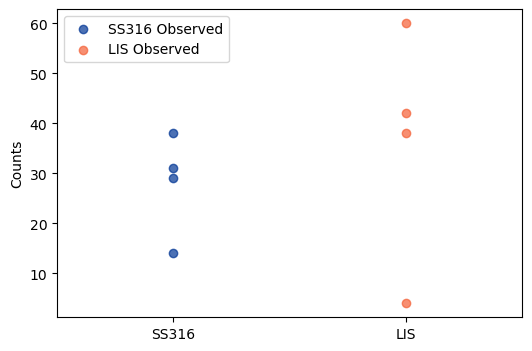

In [34]:
ss316_cols = ["SS316.1", "SS316.2", "SS316.3", "SS316.4"]
lis_cols = ["LIS.1", "LIS.2", "LIS.3", "LIS.4"]

index = 755

ss_counts = df.iloc[index][ss316_cols].values
lis_counts = df.iloc[index][lis_cols].values
counts_all = np.concatenate([ss_counts, lis_counts])
group_labels = np.array([0] * 4 + [1] * 4)

fig, ax = plt.subplots(figsize=(6, 4))

# X positions for SS316: [0, 0, 0, 0], LIS: [1,1,1,1]
x_ss = np.zeros_like(ss_counts)
x_lis = np.ones_like(lis_counts)

# Scatter the raw counts
ax.scatter(x_ss, ss_counts, color="#003594", label="SS316 Observed", alpha=0.7)
ax.scatter(x_lis, lis_counts, color="#f46036", label="LIS Observed", alpha=0.7)

# Clean up the plot
ax.set_xlim(-0.5, 1.5)
ax.set_xticks([0, 1])
ax.set_xticklabels(["SS316", "LIS"])
ax.set_ylabel("Counts")
ax.legend(loc="best")
plt.show()

## Negative Binomial Distribution 

We will use the parameterization:

- $\mu$: the mean
- $\alpha$: the dispersion  

(Alternatively, $r = 1/\alpha$.)

For a single count $x$, the probability mass function is:

$$
\mathrm{NB}(x; \mu,\alpha) 
= \binom{x + \tfrac{1}{\alpha}-1}{x}
  \left(\frac{1/\alpha}{1/\alpha + \mu}\right)^{\frac{1}{\alpha}}
  \left(\frac{\mu}{1/\alpha + \mu}\right)^{x}.
$$

We want the negative log-likelihood of these counts, so we sum the log of the PMF over all observations and put a minus sign in front.

### Null model

Single group (Reduced model, ignoring condition):  
We assume all 8 samples (4 of SS316 + 4 of LIS) share the *same* mean $\mu$.

In [35]:
from math import lgamma, log

In [36]:
def negbin_nloglik_single(params, counts):
    """
    Negative log-likelihood for a single negative binomial distribution.
    params = [mu, alpha]
    counts = array-like of counts from *all samples*, ignoring group.
    """
    mu, alpha = params

    # If parameters go non-positive, penalize with infinity (invalid region)
    if mu <= 0 or alpha <= 0:
        return np.inf

    r = 1.0 / alpha
    nll = 0.0
    for x in counts:
        # log PMF pieces for NB
        # We'll do (lgamma(x + r) - lgamma(r) - lgamma(x+1) + ... ) carefully
        # Then we accumulate the negative log-likelihood
        term = (
            lgamma(x + r)
            - lgamma(r)
            - lgamma(x + 1)
            + r * log(r / (r + mu))
            + x * log(mu / (r + mu))
        )
        # We are summing the *negative* of log PMF, so subtract
        nll -= term

    return nll

### Fit model

In [37]:
from scipy.optimize import minimize

In [38]:
def fit_reduced_model(counts):
    """
    Fit a single NB distribution to all counts (reduced model).
    returns (mu_hat, alpha_hat, neg_loglike).
    """
    mu_init = np.mean(counts) + 1e-9
    alpha_init = 0.1  # an arbitrary guess
    init_params = [mu_init, alpha_init]

    bnds = [(1e-9, None), (1e-9, None)]
    result = minimize(
        negbin_nloglik_single,
        init_params,
        args=(counts,),
        method="L-BFGS-B",
        bounds=bnds,
    )
    mu_hat, alpha_hat = result.x
    nll = result.fun
    return mu_hat, alpha_hat, nll

In [39]:
mu_r, alpha_r, nll_r = fit_reduced_model(counts_all)

In [40]:
# Negative binomial param conversion:
# If X ~ NB(r, p) in NumPy's parameterization, E[X] = r * (1-p)/p.
# We have mean = mu, dispersion alpha => r = 1/alpha, p = r/(r+mu).
# So if r=1/alpha, p = r/(r+mu):
def sample_nb(mu, alpha, size=1000):
    r = 1.0 / alpha
    p = r / (r + mu)
    # np.random.negative_binomial(n, p) => n = r, success prob = p
    # yields # of failures (X) until n successes with prob p each trial
    # but the mean will match if we do it this way.
    samples = np.random.negative_binomial(r, p, size=size)
    return samples

In [41]:
samples_r = sample_nb(mu_r, alpha_r, size=2000)

{'bodies': [<matplotlib.collections.FillBetweenPolyCollection object at 0x7aca33f6f0e0>, <matplotlib.collections.FillBetweenPolyCollection object at 0x7aca32f302d0>]}


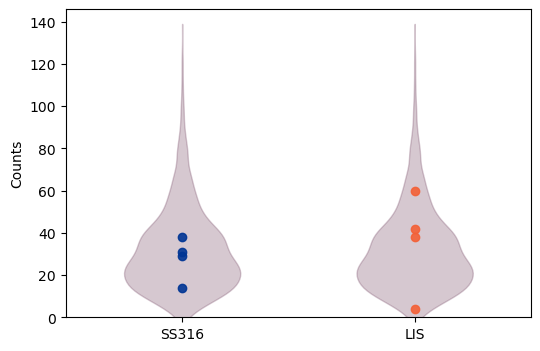

In [42]:
fig, ax = plt.subplots(figsize=(6, 4))

# X positions for SS316: [0, 0, 0, 0], LIS: [1,1,1,1]
x_ss = np.zeros_like(ss_counts)
x_lis = np.ones_like(lis_counts)

# Scatter the raw counts
ax.scatter(
    x_ss, ss_counts, color="#003594", label="SS316 Observed", alpha=0.9, zorder=10
)
ax.scatter(
    x_lis, lis_counts, color="#f46036", label="LIS Observed", alpha=0.9, zorder=10
)


data_to_violin = [samples_r, samples_r]
parts = ax.violinplot(
    dataset=data_to_violin,
    positions=[0, 1],
    showmeans=False,
    showextrema=False,
    showmedians=False,
)

parts["bodies"][0].set_facecolor("#784A66")
parts["bodies"][0].set_edgecolor("#784A66")
parts["bodies"][1].set_facecolor("#784A66")
parts["bodies"][1].set_edgecolor("#784A66")
print(parts)

# Clean up the plot
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0)
ax.set_xticks([0, 1])
ax.set_xticklabels(["SS316", "LIS"])
ax.set_ylabel("Counts")
plt.show()

### Alternative model

Two groups (Full model):  
We allow SS316 to have mean $\mu_1$ and LIS to have mean $\mu_2$, but keep a single $\alpha$ for simplicity.

In [43]:
def negbin_nloglik_two_groups(params, counts, group_labels):
    """
    Negative log-likelihood for a two-group NB model.
    params = [mu1, mu2, alpha]
    counts: all counts from both groups combined
    group_labels: 0 for group1 (SS316), 1 for group2 (LIS)
    """
    mu1, mu2, alpha = params
    if mu1 <= 0 or mu2 <= 0 or alpha <= 0:
        return np.inf

    r = 1.0 / alpha
    nll = 0.0

    # separate counts by group
    group1_counts = counts[group_labels == 0]
    group2_counts = counts[group_labels == 1]

    # group1
    for x in group1_counts:
        term = (
            lgamma(x + r)
            - lgamma(r)
            - lgamma(x + 1)
            + r * log(r / (r + mu1))
            + x * log(mu1 / (r + mu1))
        )
        nll -= term

    # group2
    for x in group2_counts:
        term = (
            lgamma(x + r)
            - lgamma(r)
            - lgamma(x + 1)
            + r * log(r / (r + mu2))
            + x * log(mu2 / (r + mu2))
        )
        nll -= term

    return nll

In [44]:
def fit_full_model(counts_all, group_labels):
    """
    Fit two-group NB (mu1, mu2, alpha).
    returns (mu1_hat, mu2_hat, alpha_hat, neg_loglike).
    """
    group1_counts = counts_all[group_labels == 0]
    group2_counts = counts_all[group_labels == 1]

    mu1_init = np.mean(group1_counts) + 1e-9
    mu2_init = np.mean(group2_counts) + 1e-9
    alpha_init = 0.1
    init_params = [mu1_init, mu2_init, alpha_init]

    bnds = [(1e-9, None), (1e-9, None), (1e-9, None)]
    result = minimize(
        negbin_nloglik_two_groups,
        init_params,
        args=(counts_all, group_labels),
        method="L-BFGS-B",
        bounds=bnds,
    )

    mu1_hat, mu2_hat, alpha_hat = result.x
    nll = result.fun
    return mu1_hat, mu2_hat, alpha_hat, nll

In [45]:
mu_ss, mu_lis, alpha_f, nll_f = fit_full_model(counts_all, group_labels)

In [46]:
samples_f_ss = sample_nb(mu_ss, alpha_f, size=2000)
samples_f_lis = sample_nb(mu_lis, alpha_f, size=2000)


{'bodies': [<matplotlib.collections.FillBetweenPolyCollection object at 0x7aca32fa0910>, <matplotlib.collections.FillBetweenPolyCollection object at 0x7aca32fa0a50>]}


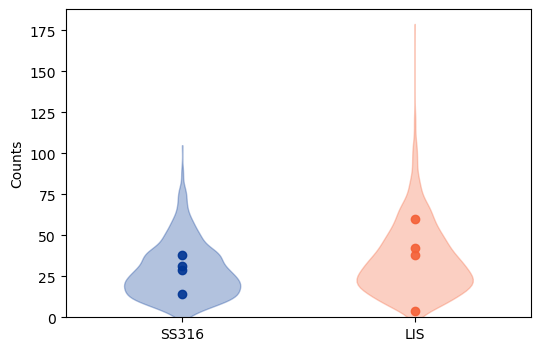

In [47]:
fig, ax = plt.subplots(figsize=(6, 4))

# X positions for SS316: [0, 0, 0, 0], LIS: [1,1,1,1]
x_ss = np.zeros_like(ss_counts)
x_lis = np.ones_like(lis_counts)

# Scatter the raw counts
ax.scatter(
    x_ss, ss_counts, color="#003594", label="SS316 Observed", alpha=0.9, zorder=10
)
ax.scatter(
    x_lis, lis_counts, color="#f46036", label="LIS Observed", alpha=0.9, zorder=10
)


data_to_violin = [samples_f_ss, samples_f_lis]
parts = ax.violinplot(
    dataset=data_to_violin,
    positions=[0, 1],
    showmeans=False,
    showextrema=False,
    showmedians=False,
)

parts["bodies"][0].set_facecolor("#003594")
parts["bodies"][0].set_edgecolor("#003594")
parts["bodies"][1].set_facecolor("#f46036")
parts["bodies"][1].set_edgecolor("#f46036")
print(parts)

# Clean up the plot
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0)
ax.set_xticks([0, 1])
ax.set_xticklabels(["SS316", "LIS"])
ax.set_ylabel("Counts")
plt.show()

## Likelihood Ratio Test

1. Reduced model negative log-likelihood = $ \text{NLL}_r $  
2. Full model negative log-likelihood    = $ \text{NLL}_f $  
3. LRT statistic:  
   $$
     \chi^2 = 2(\text{NLL}_r - \text{NLL}_f)
   $$  
4. The difference in degrees of freedom is 1 (the extra parameter $\mu_2$ minus the single $\mu$ in the reduced model).  
5. p-value = $1 - F_{\chi^2_1}(\chi^2)$.

In [48]:
from scipy.stats import chi2

In [49]:
# LRT statistic
lr_stat = 2.0 * (nll_r - nll_f)
# p-value
p_val = 1.0 - chi2.cdf(lr_stat, df=1)

print(p_val)

0.562979518791411


Log2 fold change

In [50]:
log2_fc = np.log2((mu_lis + 1e-8) / (mu_ss + 1e-8))
print(log2_fc)

0.36257008369198473
